<a href="https://colab.research.google.com/github/DilightCs/data-science-tools/blob/main/TeslaProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1: Use yfinance to Extract Stock Data

In [5]:
!pip install yfinance
import yfinance as yf
tesla = yf.Ticker("TSLA")

In [6]:
tesla_data = tesla.history(period='max')

In [ ]:
tesla_data

In [8]:
tesla_data.reset_index(inplace=True)

In [9]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
!pip install requests
import requests

In [ ]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup

In [64]:
def make_graph(stock_data, revenue_data, stock):
    """
    Creates a line chart with two lines, one for stock prices and one for revenue.

    Args:
        stock_data: A Pandas DataFrame containing historical stock prices.
        revenue_data: A Pandas DataFrame containing historical revenue data.
        stock: The ticker symbol of the stock.
    """

    # Create the plot
    plt.figure()

    # Plot the stock prices
    plt.plot(stock_data["Date"], stock_data["Close"], label="Stock Price")

    #

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and give it the alias 'plt'

# ... rest of your code ...

plt.figure() # Now you can use 'plt' to create a figure

In [70]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [24]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url=url).text

In [25]:
soup = BeautifulSoup(html_data)

In [28]:
table = soup.find_all('tbody')[1]

In [37]:
data_dict = {
    'Date':[],
    "Revenue":[]}

In [38]:
for row in table.find_all('tr'):
    date = row.find_all('td')[0].string
    revenue = row.find_all('td')[1].string
    data_dict['Date'].append(date)
    data_dict['Revenue'].append(revenue)

In [33]:
tesla_revenue = pd.DataFrame(data_dict)

In [34]:
tesla_revenue ['Revenue'] = tesla_revenue['Revenue'].str.replace(',',"")
tesla_revenue ['Revenue'] = tesla_revenue['Revenue'].str.replace('$',"")

In [35]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [41]:
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


# Question 3: Use yfinance to Extract Stock Data

In [42]:
Game_Stop = yf.Ticker("GME")

In [44]:
gme_data = Game_Stop.history(period='max')

In [46]:
gme_data.reset_index(inplace=True)
gme_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

In [47]:
url = "https://cf-courses-data.s3.us.cloud-object-Storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [48]:
html_data = requests.get(url).text

In [49]:
soup = BeautifulSoup(html_data)

In [50]:
table = soup.find_all('tbody')[1]

In [51]:
data_dict = {
    'Date':[],
    "Revenue":[]}

In [52]:
for row in table.find_all('tr'):
    date = row.find_all('td')[0].string
    revenue = row.find_all('td')[1].string
    data_dict['Date'].append(date)
    data_dict['Revenue'].append(revenue)

In [53]:
gme_revenue = pd.DataFrame(data_dict)

In [54]:
gme_revenue ['Revenue'] = gme_revenue['Revenue'].str.replace(',',"")
gme_revenue ['Revenue'] = gme_revenue['Revenue'].str.replace('$',"")

In [55]:
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


# Question 5: Plot Tesla Stock Graph

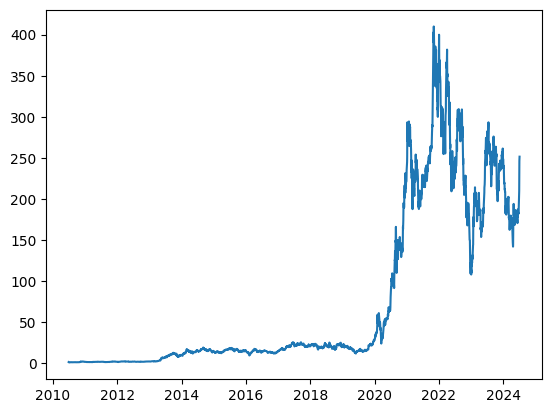

In [67]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

# Question 6: Plot GameStop Stock Graph

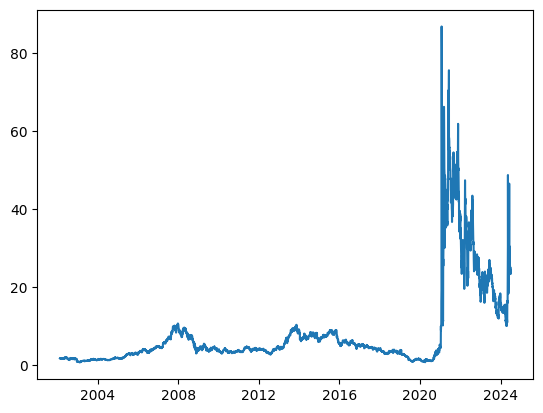

In [71]:
make_graph(gme_data, gme_revenue, 'GameStop')